# Part 1: Clustering

Perform clustering on FIFA 18 player performance data (PlayerAttributeData.csv)

- Use both visuals and statistical methods (elbow) to identify a cluster multiplicity
- Use the PlayerPersonalData.csv data to assign a label to each cluster (e.g. cluster x - average age is young, nationality is Spanish, and wages are high)


In [252]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [253]:
df_attribute = pd.read_csv('fifa18players/PlayerAttributeData.csv')

In [254]:
df_personal = pd.read_csv('fifa18players/PlayerPersonalData.csv')

In [255]:
df_attribute

,Unnamed: 0,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,0,89,63,89,63,93,95,85,81,91,...,96,83,94,23,91,92,31,80,85,88
1,1,92,48,90,95,95,96,77,89,97,...,95,88,85,26,87,73,28,59,90,85
2,2,94,56,96,82,95,92,75,81,96,...,88,81,80,33,90,78,24,53,80,83
3,3,88,78,86,60,91,83,77,86,86,...,93,83,87,38,77,89,45,80,84,88
4,4,58,29,52,35,48,70,15,14,30,...,85,55,25,11,61,44,10,83,70,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,17976,24,16,38,26,12,23,14,13,12,...,40,19,19,10,32,28,11,50,26,6
17977,17977,25,44,35,44,22,44,11,12,11,...,51,12,13,13,25,32,12,47,17,12
17978,17978,66,26,60,77,41,50,28,32,37,...,54,42,42,14,51,33,17,32,37,33
17979,17979,57,46,58,74,43,45,34,30,41,...,49,49,43,47,58,49,48,46,51,25


In [256]:
len(df_attribute['ID'].unique())

17929

In [257]:
df_attribute = df_attribute.drop(columns=['Unnamed: 0'])

In [258]:
df_attribute.drop_duplicates(keep='first')

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,24,16,38,26,12,23,14,13,12,5,...,40,19,19,10,32,28,11,50,26,6
17977,25,44,35,44,22,44,11,12,11,11,...,51,12,13,13,25,32,12,47,17,12
17978,66,26,60,77,41,50,28,32,37,47,...,54,42,42,14,51,33,17,32,37,33
17979,57,46,58,74,43,45,34,30,41,32,...,49,49,43,47,58,49,48,46,51,25


In [259]:
df_attribute = df_attribute.drop(columns=['ID'])

Check if any of the values in data are missing

In [260]:
df_attribute.isnull().values.any()

False

Check data types, if not numeric, we will convert to numeric to allow data manipulation

In [261]:
df_attribute.dtypes

Acceleration          object
Aggression            object
Agility               object
Balance               object
Ball control          object
Composure             object
Crossing              object
Curve                 object
Dribbling             object
Finishing             object
Free kick accuracy    object
GK diving             object
GK handling           object
GK kicking            object
GK positioning        object
GK reflexes           object
Heading accuracy      object
Interceptions         object
Jumping               object
Long passing          object
Long shots            object
Marking               object
Penalties             object
Positioning           object
Reactions             object
Short passing         object
Shot power            object
Sliding tackle        object
Sprint speed          object
Stamina               object
Standing tackle       object
Strength              object
Vision                object
Volleys               object
dtype: object

In [262]:
df_attribute = df_attribute.astype(str)

In [263]:
df_attribute = df_attribute.applymap(eval)

In [264]:
df_attribute.dtypes

Acceleration          int64
Aggression            int64
Agility               int64
Balance               int64
Ball control          int64
Composure             int64
Crossing              int64
Curve                 int64
Dribbling             int64
Finishing             int64
Free kick accuracy    int64
GK diving             int64
GK handling           int64
GK kicking            int64
GK positioning        int64
GK reflexes           int64
Heading accuracy      int64
Interceptions         int64
Jumping               int64
Long passing          int64
Long shots            int64
Marking               int64
Penalties             int64
Positioning           int64
Reactions             int64
Short passing         int64
Shot power            int64
Sliding tackle        int64
Sprint speed          int64
Stamina               int64
Standing tackle       int64
Strength              int64
Vision                int64
Volleys               int64
dtype: object

In [265]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_attribute)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [266]:
labels = kmeans.predict(df_attribute)
centroids = kmeans.cluster_centers_

In [267]:
labels

array([4, 4, 4, ..., 0, 1, 1], dtype=int32)

In [268]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

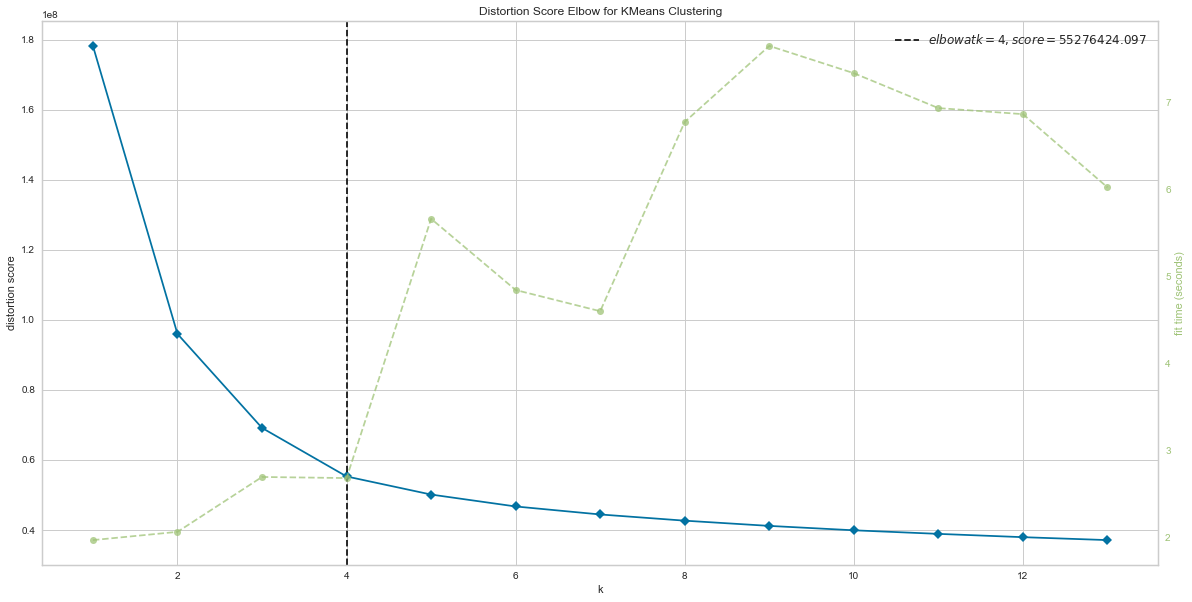

''

In [176]:
# Instantiate the clustering model and visualizer
model = KMeans(
    n_clusters=12,
    init='k-means++',
    n_init=10,
    max_iter=200,
    tol=0.0001,
    precompute_distances='auto',
    verbose=2,
    random_state=None,
    copy_x=True,
    n_jobs=-1,
    algorithm='auto',
)
visualizer = KElbowVisualizer(model, k=(1,14))

visualizer.fit(df_attribute)        # Fit the data to the visualizer
visualizer.show()                   # Finalize and render the figure
; 

We can see that our elbow is identified at k=4

In [269]:
modfit = KMeans(n_clusters=4).fit(df_attribute)

In [270]:
labels = modfit.predict(df_attribute)

In [271]:
labels

array([0, 0, 0, ..., 0, 2, 2], dtype=int32)

In [272]:
df_attribute['cluster_id'] = labels

In [273]:
df_attribute2 = df_attribute.sort_values(by='cluster_id')

In [274]:
plt.rcParams["figure.figsize"] = (20,10)

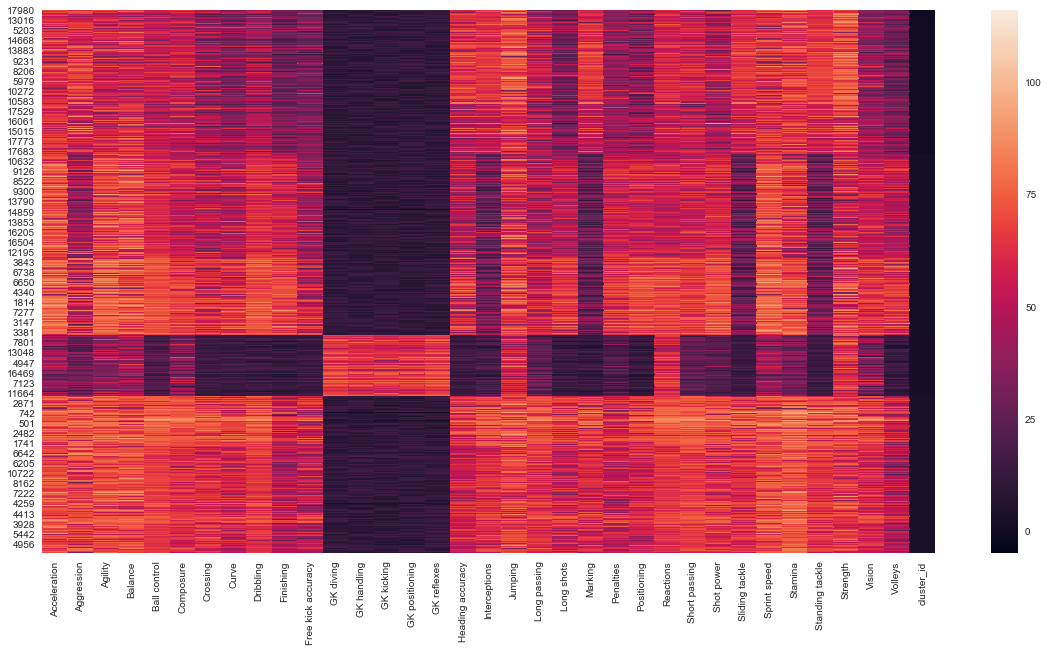

In [183]:
sns.heatmap(df_attribute2)

From the heatmap that we produced after ordering by cluster id, we can clearly sep

In [184]:
plt.rcParams["figure.figsize"] = (20,10)

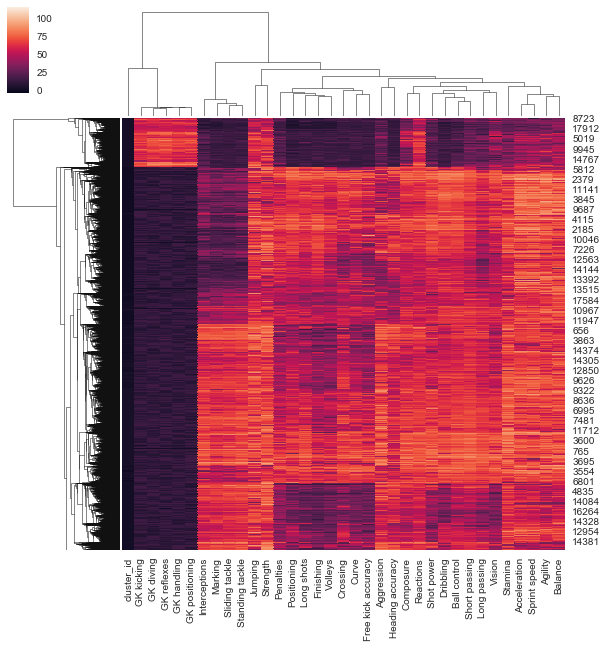

In [139]:
sns.clustermap(df_attribute)

In [275]:
df_attribute_new = pd.read_csv('fifa18players/PlayerAttributeData.csv')

/Users/timothypillow/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [276]:
df_attribute.drop_duplicates(keep='first')
df_attribute_new = df_attribute_new.astype(str)
df_attribute_new = df_attribute_new.applymap(eval)
df_attribute_new = df_attribute_new.drop(columns=['Unnamed: 0'])

In [277]:
df_attribute_new['cluster_id'] = labels

In [193]:
df_joined = pd.concat([df_attribute_new['cluster_id'], df_personal], axis=1)

In [280]:
df_joined

,cluster_id,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
0,1,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154
2,1,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291
4,2,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,2,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,€50K,€1K,755
17977,2,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.org/flags/14.png,46,46,Wycombe Wanderers,https://cdn.sofifa.org/24/18/teams/1933.png,€0,€1K,832
17978,1,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,46,61,Swindon Town,https://cdn.sofifa.org/24/18/teams/1934.png,€60K,€1K,1194
17979,0,J. Lundstram,18,https://cdn.sofifa.org/48/18/players/238813.png,England,https://cdn.sofifa.org/flags/14.png,46,64,Crewe Alexandra,https://cdn.sofifa.org/24/18/teams/121.png,€60K,€1K,1302


In [281]:
df_joined.drop_duplicates(keep='first')

,cluster_id,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
0,1,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154
2,1,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291
4,2,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,2,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,€50K,€1K,755
17977,2,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.org/flags/14.png,46,46,Wycombe Wanderers,https://cdn.sofifa.org/24/18/teams/1933.png,€0,€1K,832
17978,1,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,46,61,Swindon Town,https://cdn.sofifa.org/24/18/teams/1934.png,€60K,€1K,1194
17979,0,J. Lundstram,18,https://cdn.sofifa.org/48/18/players/238813.png,England,https://cdn.sofifa.org/flags/14.png,46,64,Crewe Alexandra,https://cdn.sofifa.org/24/18/teams/121.png,€60K,€1K,1302


In [282]:
df_joined.dtypes

cluster_id      int32
Name           object
Age             int64
Photo          object
Nationality    object
Flag           object
Overall         int64
Potential       int64
Club           object
Club Logo      object
Value          object
Wage           object
Special         int64
dtype: object

In [292]:
df_joined['Wage'] = df_joined['Wage'].map(lambda x: x.lstrip('€K').rstrip('€K'))
df_joined['Value'] = df_joined['Value'].map(lambda x: x.lstrip('€KM').rstrip('€KM'))

In [294]:
df_joined = df_joined.sort_values(by='cluster_id')

In [295]:
df_joined

,cluster_id,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
17980,0,L. Sackey,18,https://cdn.sofifa.org/48/18/players/238308.png,Ghana,https://cdn.sofifa.org/flags/117.png,46,64,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,50,1,1031
12728,0,W. Hume,23,https://cdn.sofifa.org/48/18/players/237275.png,United States,https://cdn.sofifa.org/flags/95.png,63,69,FC Dallas,https://cdn.sofifa.org/24/18/teams/695.png,425,1,1353
12730,0,F. Dimarco,19,https://cdn.sofifa.org/48/18/players/226268.png,Italy,https://cdn.sofifa.org/flags/27.png,63,77,FC Sion,https://cdn.sofifa.org/24/18/teams/110770.png,700,2,1612
12732,0,K. Mukuhara,27,https://cdn.sofifa.org/48/18/players/237788.png,Japan,https://cdn.sofifa.org/flags/163.png,63,63,Sanfrecce Hiroshima,https://cdn.sofifa.org/24/18/teams/113157.png,300,1,1478
4725,0,L. Antei,25,https://cdn.sofifa.org/48/18/players/205529.png,Italy,https://cdn.sofifa.org/flags/27.png,71,74,Benevento Calcio,https://cdn.sofifa.org/24/18/teams/112026.png,2.5,28,1478
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,3,Vítor Silva,33,https://cdn.sofifa.org/48/18/players/13127.png,Portugal,https://cdn.sofifa.org/flags/38.png,70,70,CF Reus Deportiu,https://cdn.sofifa.org/24/18/teams/110854.png,1,6,1756
12285,3,D. Chávez,22,https://cdn.sofifa.org/48/18/players/226140.png,Mexico,https://cdn.sofifa.org/flags/83.png,63,68,Tiburones Rojos de Veracruz,https://cdn.sofifa.org/24/18/teams/110145.png,425,1,1702
12284,3,P. Candelias,25,https://cdn.sofifa.org/48/18/players/160092.png,Chile,https://cdn.sofifa.org/flags/55.png,63,63,Santiago Wanderers,https://cdn.sofifa.org/24/18/teams/110976.png,400,1,1708
12308,3,O. Sveen,27,https://cdn.sofifa.org/48/18/players/207459.png,Norway,https://cdn.sofifa.org/flags/36.png,63,64,Sogndal,https://cdn.sofifa.org/24/18/teams/1465.png,425,1,1711


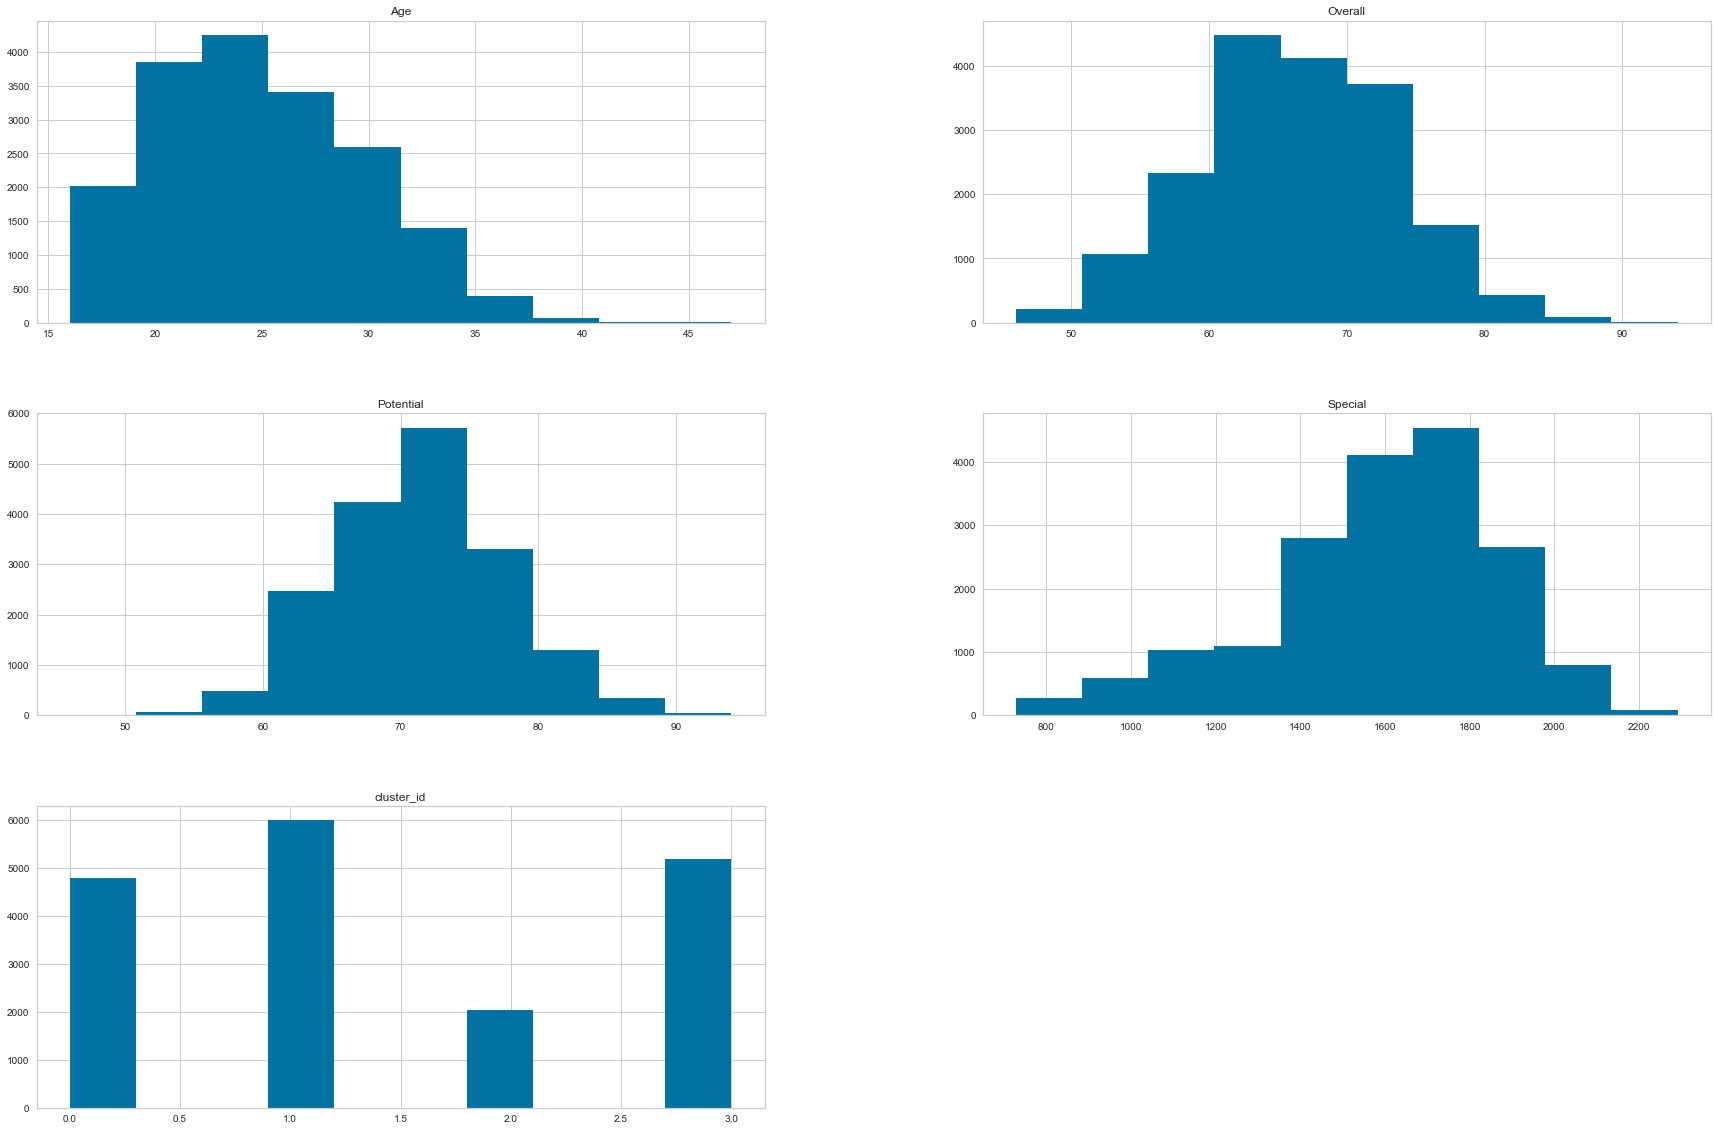

In [296]:
df_joined.hist(figsize = (30,20));

In [297]:
df_joined.plot(x='cluster_id', y='Wage')

TypeError: no numeric data to plot